Para establecer los nodos o decisiones de un árbol aleatorio, se tiene que calcular la entropia que brinda cada uno de los criterios de selección mirando la que aporta mayor entropia. Entre mayor sea la entropia que aporta, brindará mayor información a las decisiones. - Algoritmo ID3 (https://es.wikipedia.org/wiki/Algoritmo_ID3#:~:text=De%20esta%20forma%20el%20algoritmo,Nodos%3A%20Los%20cuales%20contendr%C3%A1n%20atributos.)

#### Problemas de los árboles de decisión  
* Fallan con variables continuas, una solución es elegir un intervalo o úmbrales óptimos para convertir a categorias.
* NAs: Cambiar por el valor más común por ejemplo

### Árbol de decisión para especies de flores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('python-ml-course-master/datasets/iris/iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

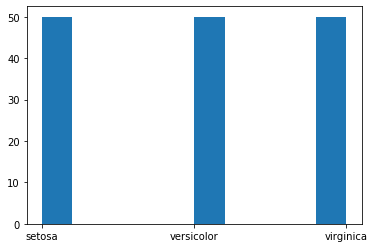

In [4]:
plt.hist(data.Species)

In [5]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [6]:
import numpy as np

In [7]:
data['is_train'] = np.random.uniform(0,1,len(data))<=0.75
data['is_train'] = data['is_train'].astype(int)

(array([ 34.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

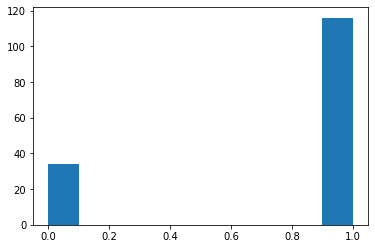

In [8]:
plt.hist(data.is_train)

In [9]:
train, test = data[data['is_train']==True], data[data['is_train']==False]

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree = DecisionTreeClassifier(criterion='entropy',min_samples_split=20,random_state=99) # Crear arbol
tree.fit(train[predictors],train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [13]:
preds = tree.predict(test[predictors])

In [14]:
pd.crosstab(test[target],preds,rownames=['Actual'],colnames=['Predictions'])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,18,0,0
versicolor,0,7,1
virginica,0,0,8


### Visualización del árbol de decisión

In [27]:
from sklearn.tree import export_graphviz

In [28]:
with open('iris_dtree.dot','w') as dotfile:
    export_graphviz(tree,out_file=dotfile,feature_names=predictors)
    dotfile.close()

In [38]:
import os
from graphviz import Source

In [39]:
file = open('iris_dtree.dot','r')
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.585\\nsamples = 116\\nvalue = [39, 38, 39]"] ;\n1 [label="entropy = 0.0\\nsamples = 39\\nvalue = [39, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 1.0\\nsamples = 77\\nvalue = [0, 38, 39]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.461\\nsamples = 41\\nvalue = [0, 37, 4]"] ;\n2 -> 3 ;\n4 [label="Petal.Width <= 1.65\\nentropy = 0.179\\nsamples = 37\\nvalue = [0, 36, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 36\\nvalue = [0, 36, 0]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.811\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n3 -> 7 ;\n8 [label="Petal.Length <= 4.85\\nentropy = 0.183\\nsamples = 36\\nvalue = [0, 1, 35]"] ;\n2 -> 8 ;\n9 [label="entropy = 1.0\\nsamples = 2\\nvalue = [0, 1, 1]"] ;\n8 ->

In [40]:
Source(text)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

### Cross Validation para la poda

In [15]:
X = data[predictors]
Y = data[target]

In [16]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=20,random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [17]:
from sklearn.model_selection import KFold

In [18]:
cv = KFold(shuffle=True,random_state=1)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
score = np.mean(cross_val_score(tree,X,Y,scoring='accuracy',cv = cv,n_jobs=1))

In [21]:
score

0.9466666666666667

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
forest = RandomForestClassifier(n_jobs=2,oob_score=True,n_estimators=10)
forest.fit(X,Y)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [24]:
forest.oob_score_

0.96